##This is 5hv5hvnk's code

#implentation using XGBoost

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from xgboost import XGBRegressor

In [3]:
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

In [4]:
DF1 = pd.read_csv('train.csv')

DF2 = pd.read_csv('test.csv')

In [5]:
MV1 = DF1.isnull().sum()
MV2 = DF2.isnull().sum()

print(f'Missing Value 1:  {MV1[MV1 > 0]}')
print(f'Missing Value 2:  {MV2[MV2 > 0]}')

Missing Value 1:  Series([], dtype: int64)
Missing Value 2:  Series([], dtype: int64)


In [6]:
data1 = DF1.copy()
data2 = DF2.copy()

In [7]:
data1

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.27270,16.68570,30.35990,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.193660,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,...,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.072170,65.15430,0.022504,-5.60680,1.798660,0.528068,6696.3000,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,1,0.784462,145,-0.463845,-0.530421,27324.90000,3.47545,160.49800,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.020200,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,...,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.462580,43.11210,-0.060801,64.04550,2.358450,5.759690,3958.1400,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,2,0.317816,19,-0.432571,-0.382644,1383.26000,19.71290,31.10260,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.699540,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,...,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.222450,50.22670,-0.026215,71.68490,2.434170,1.904560,27165.8000,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,3,0.210753,17,-0.616454,0.946362,-119.25300,4.08235,185.25700,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.809000,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,...,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.415300,116.18200,0.018674,55.44280,2.228240,4.303600,2643.7600,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.456450,10.028800,2
4,4,0.439671,20,0.968126,-0.092546,74.30200,12.30650,72.18600,-0.233964,24.399100,1.10151,1.77348,-0.546781,147.186,17.394300,0.964678,0.964894,19272478,0.121071,0.422461,-0.103100,-0.000910,8.14191,162.713,1.56561,-0.300743,7.56458,160.995,5780,-1.542540,8.09081,1.60582,7.04632,-1.056850,1.727440,126.848,0.910761,6.08868,0.150619,1.134610,...,103.9900,4.396300,0.248451,1.18082,0.546460,0.140713,0.804404,7.55191,-2.509950,68.24590,0.001230,47.28850,0.461938,1.072440,703.4010,0.691108,5.014080,6.06393,1.120250,1.73348,-0.001272,-0.333872,-0.063781,1.11420,5.233990,109,-0.158318,5.43062,0.991616,0.528518,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.784850,7.071970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [8]:
data1 = data1.drop('loss', axis=1)

In [9]:
y = DF1['loss']

In [10]:
x = data1

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=314)

In [12]:
model1v = XGBRegressor(max_depth=6,
                       n_estimators=250,
                       learning_rate=0.08,
                       subsample=0.7,
                       alpha=0.5,
                       random_state=123)                           
        
model1v.fit(x_train, y_train, verbose=100)
oof_pred1 = model1v.predict(x_train)
oof_pred1 = np.clip(oof_pred1, 0.30, y.max())
print(mean_absolute_error(y_train, oof_pred1))

[19:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.468449824640751


In [13]:
model1v.feature_importances_

array([0.00229438, 0.00347571, 0.00460918, 0.00630727, 0.00775428,
       0.00581451, 0.00760897, 0.00626844, 0.00830393, 0.00749227,
       0.00935706, 0.00868801, 0.00841962, 0.00838619, 0.00965758,
       0.00934091, 0.00912983, 0.00872449, 0.00941479, 0.00997514,
       0.00908287, 0.00992187, 0.0094398 , 0.01068695, 0.00916567,
       0.00954054, 0.01224585, 0.01022907, 0.01074186, 0.0111649 ,
       0.00915354, 0.01000965, 0.01048885, 0.00962692, 0.00989685,
       0.00989965, 0.00951955, 0.01032097, 0.00963126, 0.00935887,
       0.0105652 , 0.010435  , 0.01231306, 0.00919522, 0.00999533,
       0.01083111, 0.00991537, 0.01134332, 0.01029901, 0.01070372,
       0.01006753, 0.01154095, 0.01123226, 0.01255628, 0.01155926,
       0.00969717, 0.0100865 , 0.01047963, 0.01061726, 0.01107575,
       0.01007749, 0.01052436, 0.00949071, 0.01018714, 0.01050067,
       0.01137529, 0.0108673 , 0.01038815, 0.00990551, 0.00988941,
       0.01145833, 0.0115623 , 0.01045468, 0.01058471, 0.01066

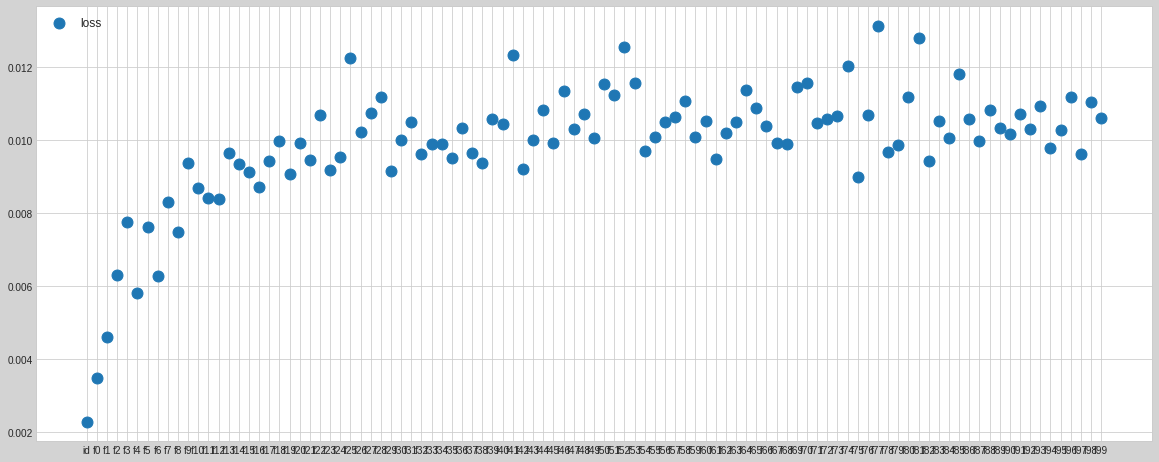

In [14]:
axis_x  = x.columns.values
axis_y = model1v.feature_importances_

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(20, 8), facecolor='lightgray')

plt.scatter(axis_x, axis_y, s=120, label='loss') 
plt.legend(fontsize=12, loc=2)
plt.show()

In [15]:
model1 = XGBRegressor(max_depth=6,
                      n_estimators=250,
                      learning_rate=0.08,
                      subsample=0.7,
                      alpha=0.5,
                      random_state=314)                         

model1.fit(x, y)
pred1 = model1.predict(data2)
pred1 = np.clip(pred1, 0.30, y.max())
display(pred1, pred1.shape)

[19:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([7.4060693, 4.9209075, 7.4988685, ..., 5.392655 , 6.0344133,
       5.9964976], dtype=float32)

(150000,)

In [16]:
sample = pd.read_csv('sample_submission.csv')

In [17]:
sub_xgb = sample.copy()

sub_xgb['loss'] = pred1

In [18]:
display(sub_xgb)

,id,loss
0,250000,7.406069
1,250001,4.920907
2,250002,7.498868
3,250003,6.640740
4,250004,7.379725
...,...,...
149995,399995,7.717644
149996,399996,7.215474
149997,399997,5.392655
149998,399998,6.034413


In [19]:
sub = sub_xgb
sub.to_csv("submission_xgb.csv",index=False)

Score by above model is 7.91633 with RMSE criterion 

## Applying normalisation to train the model

In [20]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.000000,0.058636,0.262069,0.490389,0.039642,0.167960,0.520648,0.072185,0.663569,0.519427,0.201658,0.649437,0.924067,0.139886,0.237894,0.524289,0.454920,0.149490,0.860493,0.633113,0.515816,0.128709,0.295895,0.220101,0.118525,0.528319,0.293981,0.218149,0.149429,0.282051,0.241756,0.240177,0.819598,0.440549,0.176951,0.917360,0.020497,0.254884,0.772465,0.543001,...,0.692927,0.414617,0.099583,0.143174,0.299721,0.534707,0.309271,0.653382,0.382454,0.502334,0.364784,0.430743,0.084744,0.544248,0.119361,0.302153,0.390744,0.471106,0.377160,0.245867,0.462530,0.358525,0.792322,0.293070,0.504229,0.306790,0.368788,0.290508,0.359634,0.296521,0.198801,0.188769,0.368139,0.261862,0.683482,0.379244,0.441330,0.835195,0.572721,0.325062
1,0.000004,0.748009,0.558621,0.420724,0.299497,0.768412,0.176353,0.203889,0.609690,0.522879,0.446219,0.399421,0.329002,0.753923,0.075742,0.549080,0.321597,0.714358,0.301171,0.343178,0.320003,0.143570,0.146818,0.190955,0.298432,0.257788,0.425950,0.827250,0.954121,0.368553,0.061843,0.362570,0.574071,0.513549,0.189501,0.323833,0.038539,0.318873,0.642263,0.561514,...,0.368631,0.436292,0.180092,0.642121,0.352798,0.680011,0.414703,0.299537,0.262655,0.513566,0.257847,0.317454,0.448088,0.643608,0.517298,0.256262,0.772076,0.444095,0.322874,0.058480,0.505711,0.332094,0.601969,0.209909,0.577142,0.879462,0.108108,0.280221,0.325658,0.154747,0.138659,0.186655,0.142436,0.308433,0.381462,0.334849,0.290870,0.394403,0.585975,0.056975
2,0.000008,0.339152,0.124138,0.422494,0.346325,0.197473,0.599544,0.072937,0.444931,0.554563,0.395758,0.698985,0.222364,0.159713,0.264298,0.551666,0.358959,0.040679,0.474839,0.505997,0.533169,0.048060,0.411595,0.197945,0.130561,0.306345,0.609937,0.678942,0.183768,0.135248,0.297799,0.244979,0.442898,0.713871,0.163000,0.216040,0.208747,0.347292,0.722296,0.526454,...,0.074983,0.549384,0.335811,0.538856,0.372325,0.067797,0.395572,0.600923,0.387391,0.506657,0.292363,0.364488,0.487939,0.657048,0.224063,0.645218,0.353096,0.437811,0.260026,0.273825,0.279778,0.375627,0.693345,0.134951,0.343946,0.559284,0.114211,0.209864,0.369137,0.116140,0.188112,0.189513,0.491562,0.597841,0.592630,0.374409,0.499214,0.672652,0.456020,0.377146
3,0.000012,0.245348,0.117241,0.412084,0.767463,0.164405,0.192171,0.228946,0.677797,0.469969,0.202030,0.464602,0.140188,0.264186,0.254784,0.302373,0.412415,0.066962,0.799040,0.536940,0.472968,0.057247,0.195225,0.280057,0.265507,0.263885,0.271801,0.438821,0.842650,0.838496,0.164054,0.258039,0.249807,0.661158,0.083805,0.221138,0.245202,0.382645,0.721874,0.299924,...,0.290758,0.366583,0.198597,0.504307,0.364799,0.509579,0.478107,0.653945,0.391497,0.512206,0.612343,0.425534,0.403211,0.620496,0.406543,0.234233,0.193855,0.465704,0.359251,0.178379,0.560877,0.394139,0.824503,0.238525,0.474676,0.642345,0.469050,0.404314,0.342671,0.163167,0.188245,0.189547,0.055806,0.268735,0.638174,0.214041,0.560417,0.556307,0.409258,0.311839
4,0.000016,0.445917,0.127586,0.501790,0.438252,0.168665,0.406514,0.114515,0.479443,0.544208,0.215147,0.639068,0.324726,0.594514,0.525524,0.523147,0.453523,0.590345,0.553211,0.531561,0.433929,0.024313,0.294426,0.196035,0.057373,0.412392,0.390207,0.824782,0.095954,0.061958,0.344581,0.712735,0.412594,0.218338,0.283551,0.315708,0.028369,0.322212,0.697927,0.542229,...,0.517405,0.570632,0.300675,0.520634,0.384216,0.519257,0.339856,0.569831,0.461571,0.399277,0.379783,0.401812,0.360674,0.306988,0.160768,0.201713,0.614190,0.510549,0.333013,0.222174,0.370759,0.326923,0.603563,0.244301,0.081696,0.634329,0.117698,0.209313,0.225285,0.125899,0.238754,0.193739,0.234168,0.313882,0.386035,0.385880,0.496081,0.746932,0.473154,0.227023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=314)

In [24]:
model2v = XGBRegressor(max_depth=6,
                       n_estimators=250,
                       learning_rate=0.08,
                       subsample=0.7,
                       alpha=0.5,
                       random_state=123)                           
        
model2v.fit(x_train, y_train, verbose=100)
oof_pred1 = model2v.predict(x_train)
oof_pred1 = np.clip(oof_pred1, 0.30, y.max())
print(mean_absolute_error(y_train, oof_pred1))

[19:58:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.468449824640751


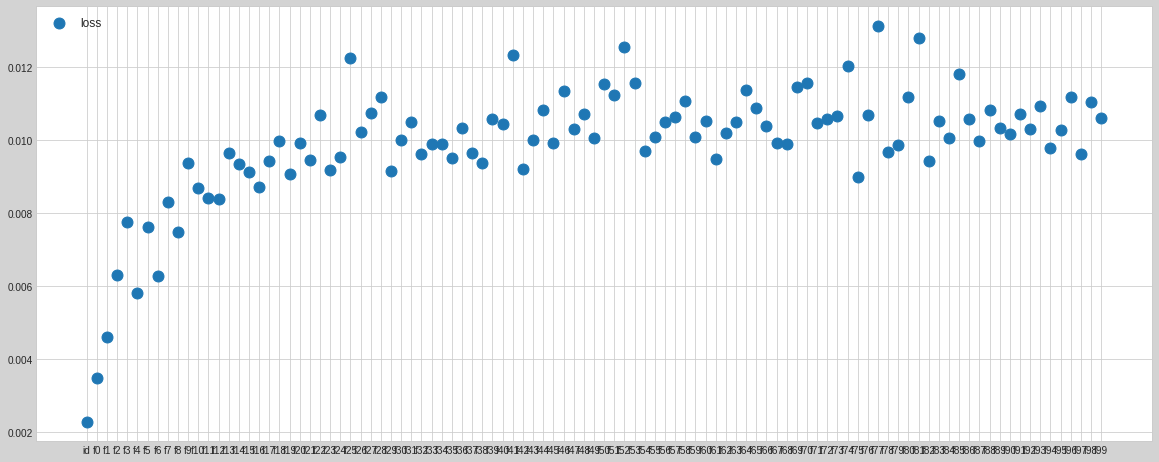

In [25]:
axis_x  = x.columns.values
axis_y = model2v.feature_importances_

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(20, 8), facecolor='lightgray')

plt.scatter(axis_x, axis_y, s=120, label='loss') 
plt.legend(fontsize=12, loc=2)
plt.show()

In [26]:
model2 = XGBRegressor(max_depth=6,
                      n_estimators=250,
                      learning_rate=0.08,
                      subsample=0.7,
                      alpha=0.5,
                      random_state=314)                         

model2.fit(x, y)
pred2 = model2.predict(data2)
pred2 = np.clip(pred2, 0.30, y.max())
display(pred2, pred2.shape)

[20:02:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([7.4060693, 4.9209075, 7.4988685, ..., 5.392655 , 6.0344133,
       5.9964976], dtype=float32)

(150000,)

In [27]:
sub_normal = sample.copy()

sub_normal['loss'] = pred2

In [28]:
sub = sub_normal
sub.to_csv("submission_normal.csv",index=False)